# Data Science Lunch & Learn

### 12 Oct 2020: Getting started with scikit-learn

https://www.crowdcast.io/e/data-science-lunch-

https://github.com/IBMDeveloperUK/Data-Science-Lunch-and-Learn/blob/master/README.md

https://github.com/IBMDeveloperUK/Data-Science-Lunch-and-Learn/blob/master/notebooks/20-10-12-getting-started-sklearn.ipynb

In [3]:
# general
import math
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
plt.style.use('seaborn-whitegrid')
%matplotlib inline

# scipy
from scipy import stats

# scikit-learn
from sklearn import datasets
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

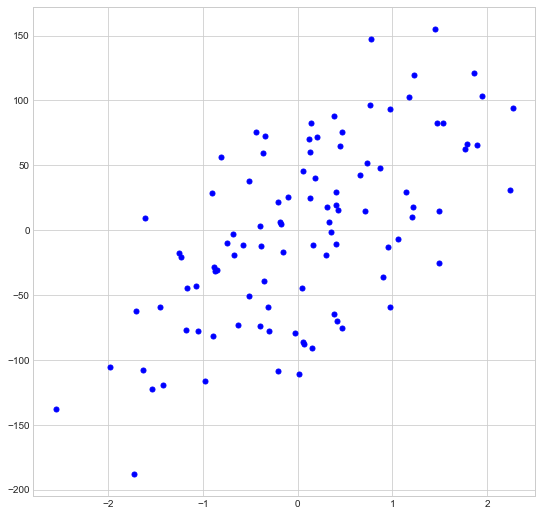

In [4]:
# create some data and create a scatter plot
X, y, coef = datasets.make_regression(n_samples=100, n_features=1, noise=50, random_state=0, coef=True)

plt.figure(figsize=(9,9))
plt.plot(X, y, '.', color='blue', markersize=10);

Fit a line through the points:

$y = a + b*x$

where $a$ the intercept (the value of $y$ where $x=0$) and $b$ is the gradient of the line.

This is actually a straightforward problem that can be solved directly with linear algebra. From this [example](https://machinelearningmastery.com/solve-linear-regression-using-linear-algebra/):

$X^T . X . b = X^T . y$

$b = (X^T . X)^-1 . X^T . y$

Note that it is assumed here that $a=0$

[This course](https://www.coursera.org/learn/machine-learning) by Andrew Ng goes into much more detail.

In [5]:
b = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(b)

[43.31629337]


In [6]:
yhat = X.dot(b)

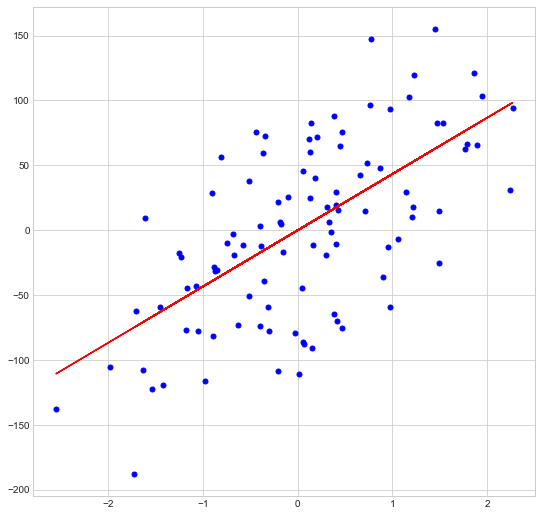

In [7]:
plt.figure(figsize=(9,9))
plt.plot(X, y, '.', color='blue', markersize=10);
plt.plot(X, yhat, color='red')

Another way to solve this is to use the mean difference between the line and all points using the least squares method, where you want to minimize (find the smallest possible value) for the root means square error:

$RMSE = \sqrt{ \frac{1}{N}\sum_{i=1}^{N} (\hat{y}_{i} - y_{i})^2}$

where $y_{i}$ is the observed value and $\hat{y}_{i}$ the simulated value for each point $i$ and $N$ the number of data points.

In [8]:
yhat.shape

(100,)

In [9]:
RMSE = np.sqrt(sum(np.power(yhat-y,2))/len(y))
RMSE

53.57985913220196

## Fitting a model with [SciPy](https://docs.scipy.org/doc/scipy/reference/)

This package contains various [optimization algorithms](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html), including the [least squares method](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html#least-squares-minimization-least-squares) that can be used to fit the above line:

In [10]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X[:,0], y)
print("slope: %f    intercept: %f" % (slope, intercept))
print("r_squared: %f    std_err: %f" % (r_value**2, std_err))

slope: 43.555132    intercept: -4.070909
r_squared: 0.403039    std_err: 5.354587


r_squared is the coefficient of determination

std_err is the [standard error](https://en.wikipedia.org/wiki/Standard_error)

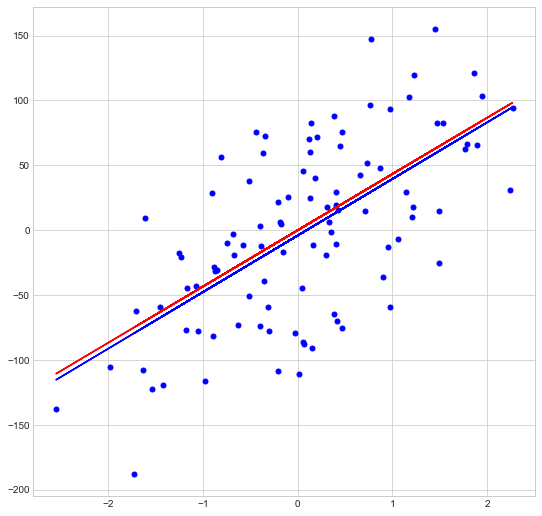

In [11]:
plt.figure(figsize=(9,9))
plt.plot(X, y, '.', color='blue', markersize=10)
plt.plot(X, yhat, color='red')
plt.plot(X, intercept + slope*X, 'blue');

In [12]:
yhat_scipy = intercept + slope*X

In [13]:
RMSE_scipy = np.sqrt(sum(np.power(yhat_scipy[:,0]-y,2))/len(y))
RMSE_scipy

53.425529049368066

## Fitting a model with Scikit-learn

When the data becomes more complex, e.g. many more variables, non-linear, including binary or multiple classes fitting a 'line' through the data is less straightforward.

The principle stays the same: find the best 'line' through your data points. This 'line' is the machine learning model.

With scikit-learn:

In [14]:
lr = linear_model.LinearRegression()

lr.fit(X,y)

y_pred= lr.predict(X)

print(lr)
print('Intercept: \n',lr.intercept_)
print('Coefficients: \n', lr.coef_)

LinearRegression()
Intercept: 
 -4.070909135153631
Coefficients: 
 [43.55513203]


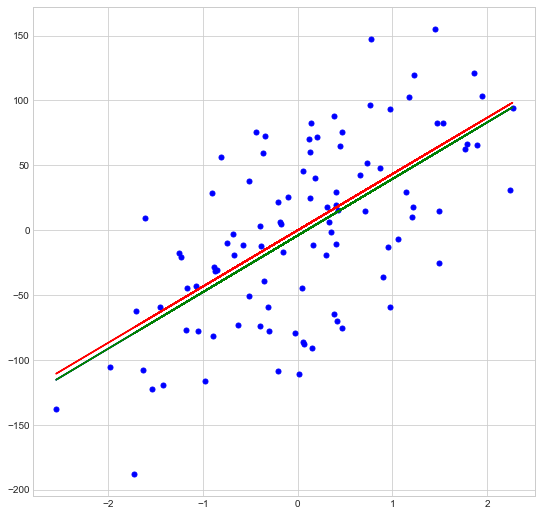

In [15]:
plt.figure(figsize=(9,9))
plt.plot(X, y, '.', color='blue', markersize=10)
plt.plot(X, yhat, color='red')
plt.plot(X, intercept + slope*X, 'blue')
plt.plot(X, y_pred, color='green');

In [16]:
RMSE_sklearn = np.sqrt(sum(np.power(y_pred-y,2))/len(y))
RMSE_sklearn

53.42552904936806

In [17]:
# Comparing the values of RMSEs of the different models produced:

RMSE_sklearn < RMSE_scipy < RMSE

True

Above a line was fitted in 3 different ways, with a few metrics calculated. This is only one part of the process when building and testing a model. A complete workflow consists of these steps:

* Data exploration
* Data preprocessing
* Splitting data for training and testing
* Preparing a model
* Assembling all of the steps using pipeline
* Training the model
* Running predictions on the model
* Evaluating and visualizing model performance
* Ideally you would go through each of these steps one by one, but in practice you will go back and forth between them when you start to understand the data better.

## A Full example

### [Diabetes dataset](https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset)

An example with data provided with scikit-learn:

* Ten baseline variables: age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline
* Each of these 10 feature variables have been mean centered and scaled by the standard deviation times n_samples (i.e. the sum of squares of each column totals 1)
* The target is a quantitative measure of disease progression one year after baseline

In [18]:
# as_frame=True loads the data as a pandas DataFrame (X) and Series (y)
diabetes = datasets.load_diabetes(as_frame=True)

X = diabetes.data
y = diabetes.target

feature_names = diabetes.feature_names
print(feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [19]:
# Let´s confirm "Each of these 10 feature variables have been mean centered and scaled by the standard
# deviation times n_samples (i.e. the sum of squares of each column totals 1)"

for feat in diabetes.feature_names:
    print(feat+": ",np.power(X[feat],2).sum())

age:  1.0000000000000746
sex:  1.0000000000000007
bmi:  1.0000000000001883
bp:  1.0000000000000182
s1:  1.0000000000000115
s2:  0.9999999999999851
s3:  1.0000000000000688
s4:  0.9999999999999492
s5:  1.0000000000001288
s6:  1.0000000000001228


In [20]:
# '.insert(···)' method is a quick way to concat a Pandas Series within a Pandas DF
X.insert(0, "target", y)

In [21]:
X.head(3)

,target,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,151.0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,75.0,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,141.0,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930


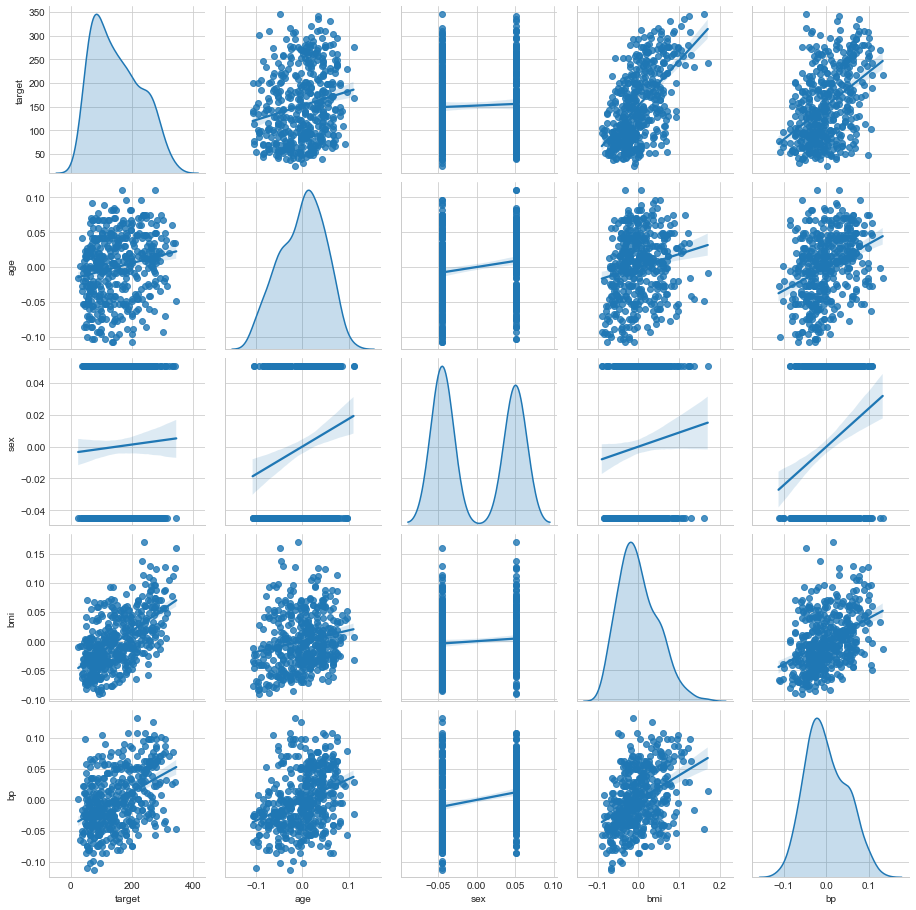

In [22]:
sns.pairplot(X[['target','age', 'sex', 'bmi', 'bp']], kind='reg', diag_kind='kde');

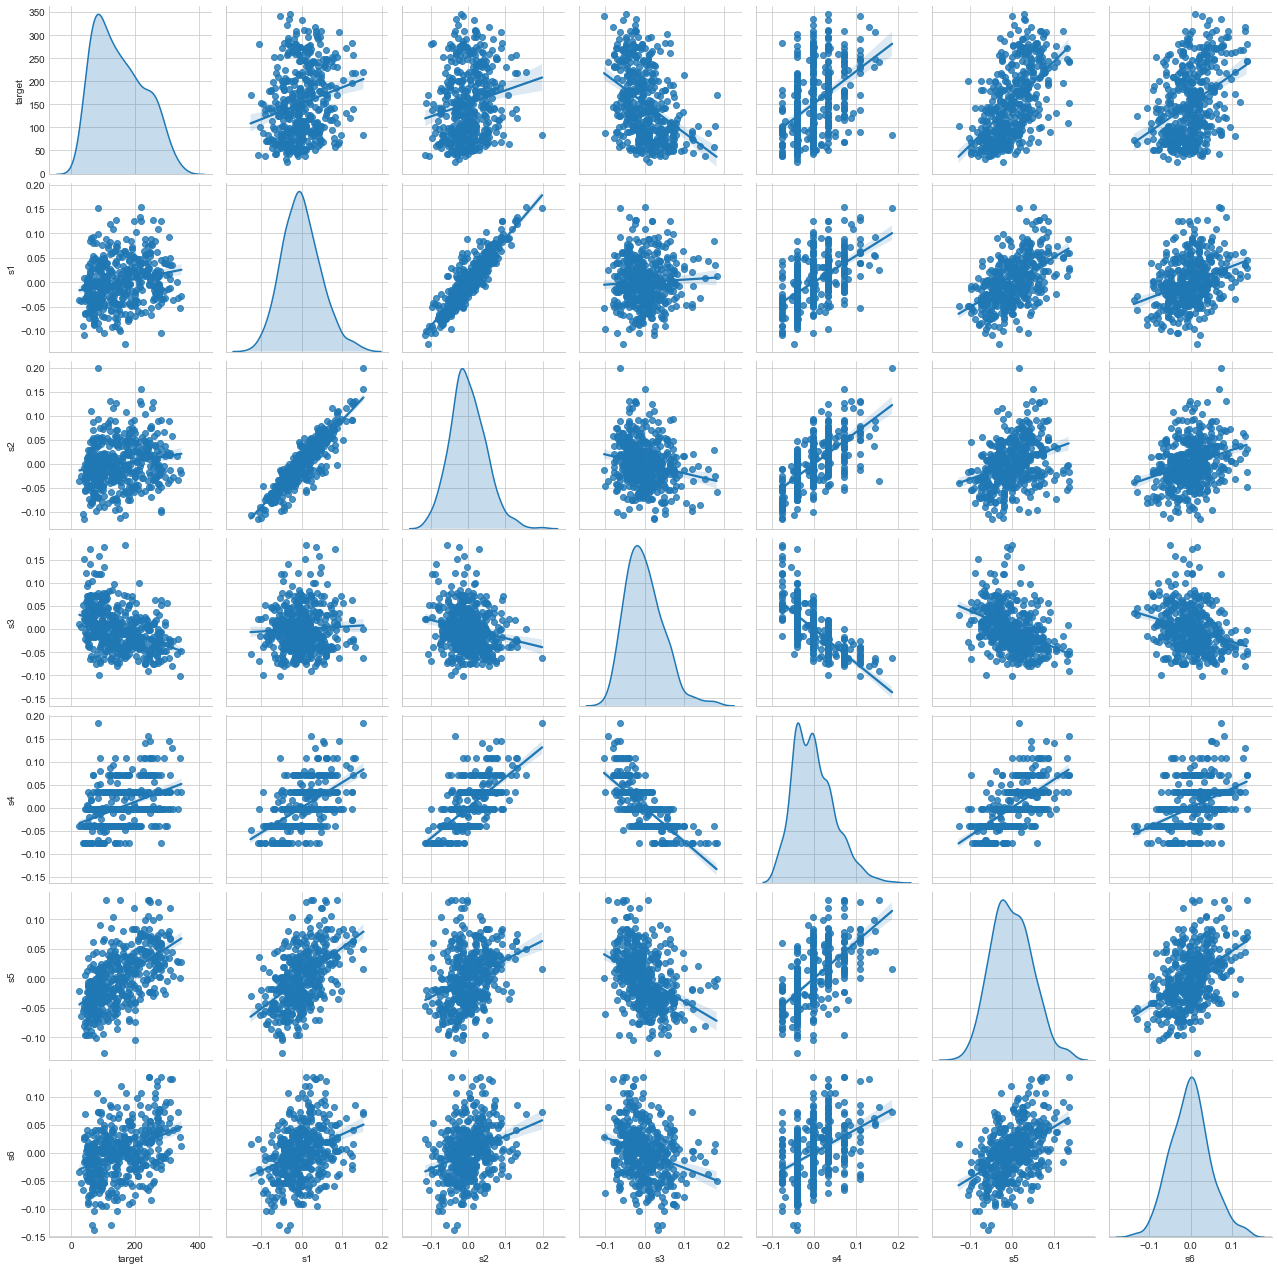

In [23]:
sns.pairplot(X[['target','s1', 's2', 's3', 's4', 's5', 's6']], kind='reg', diag_kind='kde');

In [24]:
X.corr().style.background_gradient(cmap='coolwarm')

,target,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
target,1.000000,0.187889,0.043062,0.586450,0.441484,0.212022,0.174054,-0.394789,0.430453,0.565883,0.382483
age,0.187889,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731
sex,0.043062,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133
bmi,0.586450,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680
bp,0.441484,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429
s1,0.212022,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717
s2,0.174054,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600
s3,-0.394789,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.430453,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212
s5,0.565883,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670


We really have 3 groups of data types:

* age, bmi and bp - continuous
* sex - 2 classes (0 or 1)
* s1,s2,s3,s4,s5 and s6 - seem strongly correlated, continuous
* all are normalized, so this step can be skipped

There are many ways to do that normalization. One, for example is to use:

-- sklearn.preprocessing.normalize

### Our first ML model for this dataset

To keep it simple, our first attempt to predict the target will be to use a .LinearRegression(···) from SKLearn and only ONE feature. We will choose the feature with highest correlation with the target: "BMI" which has a correlation of 0.586450

Coefficients: 
 [975.27698313]
Intercept: 
 152.0765329689407
RMSE: 61.45
Coefficient of determination (r2): 0.32


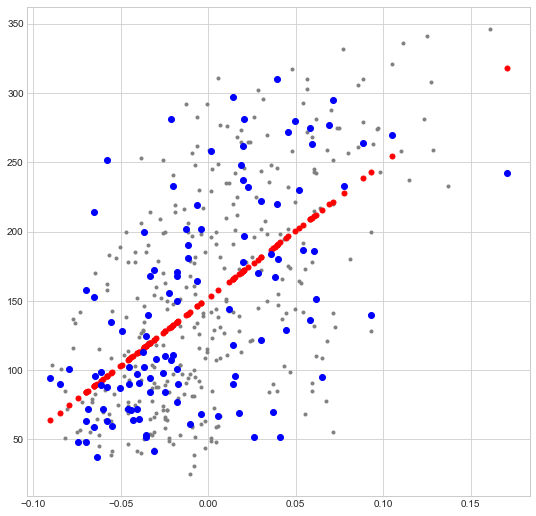

In [25]:
# Using one feature: BMI
X1 = X[['bmi']]

# Train/Test Split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.25, random_state=42)

# Create linear regression object
lm_1 = linear_model.LinearRegression()

# Train the model using the training data
lm_1.fit(X1_train, y1_train)

# Make predictions using the test data
y1_pred = lm_1.predict(X1_test)

# Printing/Plotting the parameters of the model:

print('Coefficients: \n', lm_1.coef_)
print('Intercept: \n', lm_1.intercept_)
print('RMSE: %.2f' % np.sqrt(mean_squared_error(y1_test, y1_pred)))
print('Coefficient of determination (r2): %.2f' % r2_score(y1_test, y1_pred))

plt.figure(figsize=(9,9))
plt.plot(X1_train, y1_train, '.', color='grey');
plt.plot(X1_test, y1_pred, '.', color='red', markersize=10);
plt.plot(X1_test, y1_test, '.', color='blue', markersize=12);

### Our next ML model for this dataset

We are going to grow on complexity and now work with 3 features

Coefficients: 
 [ 48.02034033 813.73658942 402.07576071]
Intercept: 
 151.88278404127527
RMSE: 59.81
Coefficient of determination: 0.35


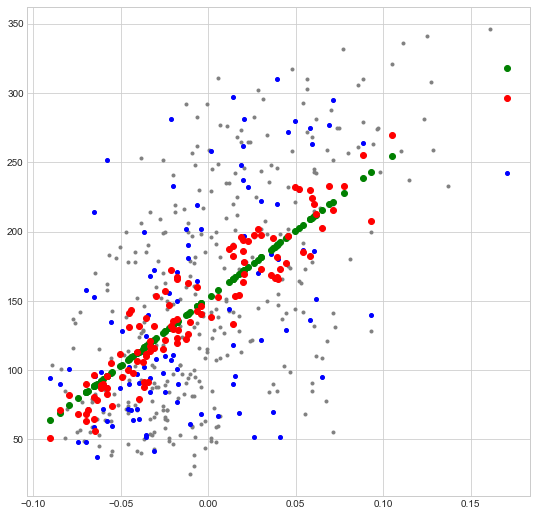

In [26]:
# Use three features
X2 = X[['age', 'bmi', 'bp']]

# Split the data into training/testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.25, random_state=42)

# Create linear regression object
lm_2 = linear_model.LinearRegression()

# Train the model using the training data
lm_2.fit(X2_train, y2_train)

# Make predictions using the test data
y2_pred = lm_2.predict(X2_test)

print('Coefficients: \n', lm_2.coef_)
print('Intercept: \n', lm_2.intercept_)
print('RMSE: %.2f' % np.sqrt(mean_squared_error(y2_test, y2_pred)))
print('Coefficient of determination: %.2f' % r2_score(y2_test, y2_pred))


plt.figure(figsize=(9,9))
plt.plot(X2_train[["bmi"]], y2_train, '.', color='grey');
plt.plot(X2_test[["bmi"]], y2_test, '.', color='blue', markersize=8);

plt.plot(X1_test, y1_pred, '.', color='green', markersize=12);
plt.plot(X2_test[["bmi"]], y2_pred, '.', color='red', markersize=12);

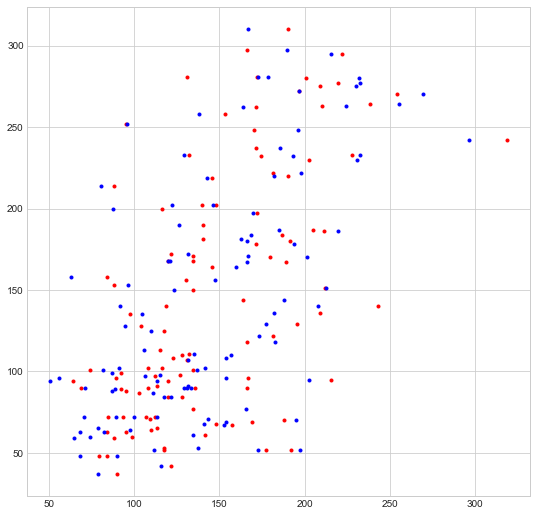

In [27]:
plt.figure(figsize=(9,9))
plt.plot(y1_pred, y1_test, '.', color='red');
plt.plot(y2_pred, y2_test, '.', color='blue');

Coefficients: 
 [-1193.09665679   872.41128407   134.72736053    91.05762854
  1121.22200444   219.84466102]
Intercept: 
 152.30816316745086
Mean squared error: 3192.50
RMSE: 56.50
Coefficient of determination: 0.42


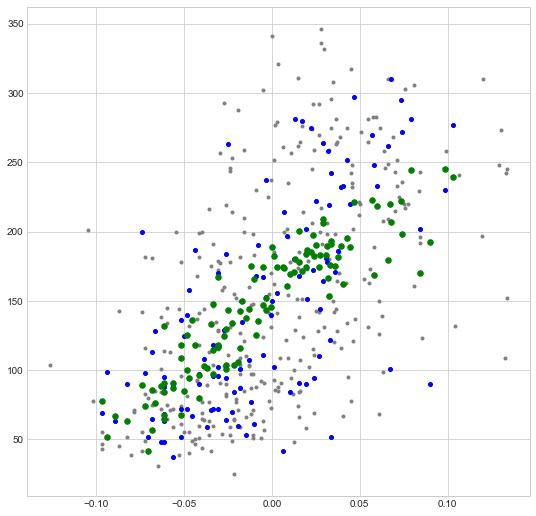

In [28]:
# Use the blood measurements
X3 = X[['s1', 's2', 's3', 's4', 's5', 's6']]

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.25, random_state=42)

# Create linear regression object
lm_3 = linear_model.LinearRegression()

# Train the model using the training data
lm_3.fit(X3_train, y3_train)

# Make predictions using the test data
y3_pred = lm_3.predict(X3_test)

print('Coefficients: \n', lm_3.coef_)
print('Intercept: \n', lm_3.intercept_)
print('Mean squared error: %.2f' % mean_squared_error(y3_test, y3_pred))
print('RMSE: %.2f' % np.sqrt(mean_squared_error(y3_test, y3_pred)))
print('Coefficient of determination: %.2f' % r2_score(y3_test, y3_pred))


plt.figure(figsize=(9,9))
plt.plot(X3_train[["s5"]], y3_train, '.', color='grey');

plt.plot(X3_test[["s5"]], y3_test, '.', color='blue', markersize=8);
plt.plot(X3_test[["s5"]], y3_pred, '.', color='green', markersize=11);

Coefficients: 
 [  47.74657117  531.96856896 -241.99180361  381.56529922 -918.49020552
  508.25147385  116.94040498  269.48508571  695.8062205    26.32343144]
Intercept: 
 151.66516982689936
RMSE: 53.37
Coefficient of determination (r2): 0.48


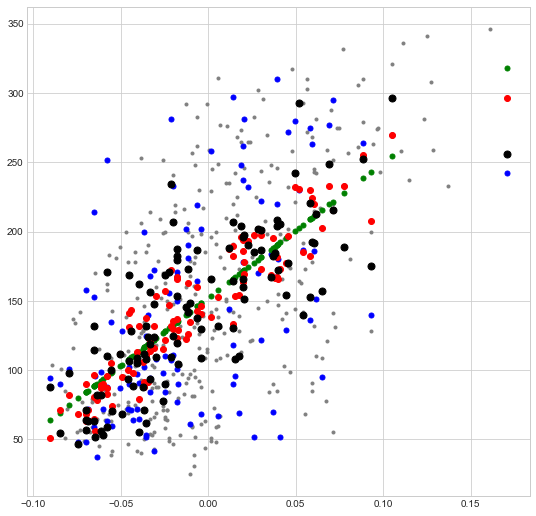

In [29]:
X4 = X[['age', 'bmi', 'sex', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']]

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y, test_size=0.25, random_state=42)

# Create linear regression object
lm_4 = linear_model.LinearRegression()

# Train the model using the training data
lm_4.fit(X4_train, y4_train)

# Make predictions using the test data
y4_pred = lm_4.predict(X4_test)

print('Coefficients: \n', lm_4.coef_)
print('Intercept: \n', lm_4.intercept_)
print('RMSE: %.2f' % np.sqrt(mean_squared_error(y4_test, y4_pred)))
print('Coefficient of determination (r2): %.2f' % r2_score(y4_test, y4_pred))

plt.figure(figsize=(9,9))
plt.plot(X2_train[["bmi"]], y2_train, '.', color='grey');
plt.plot(X2_test[["bmi"]], y2_test, '.', color='blue', markersize=10);

plt.plot(X1_test, y1_pred, '.', color='green', markersize=10);
plt.plot(X2_test[["bmi"]], y2_pred, '.', color='red', markersize=12);
plt.plot(X4_test[["bmi"]], y4_pred, '.', color='black', markersize=14);

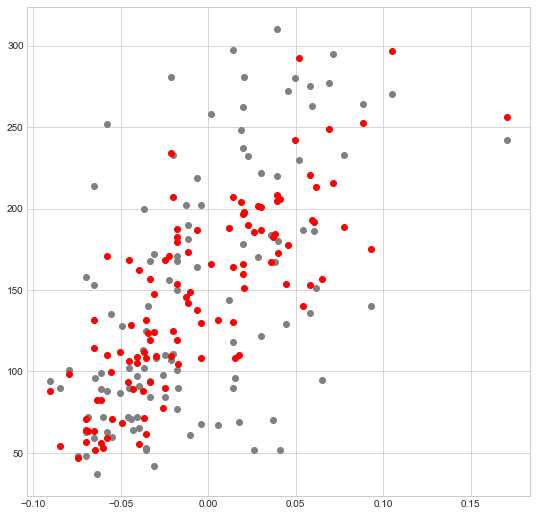

In [30]:
# Plot outputs
plt.figure(figsize=(9,9))
plt.scatter(X4_test['bmi'], y4_test, color='grey')
plt.scatter(X4_test['bmi'], y4_pred, color='red');

In [31]:
models = ['LinearRegression_BMI', 'LinearRegression_BMI,age,bp', 'LinearRegression_blood', 'LinearRegression_allfeats']
r2s = [r2_score(y1_test, y1_pred),r2_score(y2_test, y2_pred),r2_score(y3_test, y3_pred),r2_score(y4_test, y4_pred)]
RMSEs = [np.sqrt(mean_squared_error(y1_test, y1_pred)),np.sqrt(mean_squared_error(y2_test, y2_pred)),
        np.sqrt(mean_squared_error(y3_test, y3_pred)),np.sqrt(mean_squared_error(y4_test, y4_pred))]

intercept = [lm_1.intercept_, lm_2.intercept_, lm_3.intercept_, lm_4.intercept_]
age = [lm_1.coef_[0], lm_2.coef_[0], float('NaN'), lm_4.coef_[0]]
bmi = [float('NaN'), lm_2.coef_[1], float('NaN'), lm_4.coef_[1]]
bp = [float('NaN'), lm_2.coef_[2], float('NaN'), lm_4.coef_[3]]
sex = [float('NaN'), float('NaN'), float('NaN'), lm_4.coef_[2]]
s1 = [float('NaN'), float('NaN'), lm_3.coef_[0], lm_4.coef_[4]]
s2 = [float('NaN'), float('NaN'), lm_3.coef_[1], lm_4.coef_[5]]
s3 = [float('NaN'), float('NaN'), lm_3.coef_[2], lm_4.coef_[6]]
s4 = [float('NaN'), float('NaN'), lm_3.coef_[3], lm_4.coef_[7]]
s5 = [float('NaN'), float('NaN'), lm_3.coef_[4], lm_4.coef_[8]]
s6 = [float('NaN'), float('NaN'), lm_3.coef_[5], lm_4.coef_[9]]

summary = pd.DataFrame(list(zip(models, r2s, RMSEs, intercept, age, bmi, bp, sex, s1, s2, s3, s4 ,s5, s6)), 
               columns =['model', 'r2', 'RMSE', 'intercept', 'age','bmi','bp','sex', 's1', 's2', 's3', 's4', 's5', 's6'])

summary.transpose()

,0,1,2,3
model,LinearRegression_BMI,"LinearRegression_BMI,age,bp",LinearRegression_blood,LinearRegression_allfeats
r2,0.31721,0.353084,0.422661,0.484909
RMSE,61.4461,59.8101,56.5023,53.3694
intercept,152.077,151.883,152.308,151.665
age,975.277,48.0203,NaN,47.7466
bmi,NaN,813.737,NaN,531.969
bp,NaN,402.076,NaN,381.565
sex,NaN,NaN,NaN,-241.992
s1,NaN,NaN,-1193.1,-918.49
s2,NaN,NaN,872.411,508.251


## [Ridge regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) or $L_2$ regularization

* Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients.

* The complexity parameter $\alpha$ controls the amount of shrinkage: the larger the value of $\alpha$, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train = X_train.drop('target', axis=1)
X_test = X_test.drop('target', axis=1)

lm_5 = linear_model.Ridge(alpha=0.1)
#lm_5 = linear_model.Ridge(alpha=0.2,solver='lsqr')
lm_5.fit(X_train, y_train)
y5_pred = lm_5.predict(X_test)

summary.loc[len(summary)] = ['Ridge (alpha=0.1)',
                     r2_score(y_test, y5_pred),
                     np.sqrt(mean_squared_error(y_test, y5_pred)),
                     lm_5.intercept_,
                     lm_5.coef_[0],lm_5.coef_[1],lm_5.coef_[2],lm_5.coef_[3],lm_5.coef_[4],
                     lm_5.coef_[5],lm_5.coef_[6],lm_5.coef_[7],lm_5.coef_[8],lm_5.coef_[9],]

summary.transpose()

,0,1,2,3,4
model,LinearRegression_BMI,"LinearRegression_BMI,age,bp",LinearRegression_blood,LinearRegression_allfeats,Ridge (alpha=0.1)
r2,0.31721,0.353084,0.422661,0.484909,0.491828
RMSE,61.4461,59.8101,56.5023,53.3694,53.0097
intercept,152.077,151.883,152.308,151.665,151.731
age,975.277,48.0203,NaN,47.7466,52.8644
bmi,NaN,813.737,NaN,531.969,-200.509
bp,NaN,402.076,NaN,381.565,493.957
sex,NaN,NaN,NaN,-241.992,339.283
s1,NaN,NaN,-1193.1,-918.49,-118.062
s2,NaN,NaN,872.411,508.251,-80.9122


## [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso) or $L_1$ regularization

The Lasso is a linear model that estimates sparse coefficients. It is useful in some contexts due to its tendency to prefer solutions with fewer non-zero coefficients, effectively reducing the number of features upon which the given solution is dependent. For this reason Lasso and its variants are fundamental to the field of compressed sensing

Have a look at [this example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html#sphx-glr-auto-examples-linear-model-plot-lasso-model-selection-py) for a method to...

In [33]:
lm_6 = linear_model.Lasso(alpha=0.1)
lm_6.fit(X_train, y_train)
y6_pred = lm_6.predict(X_test)

summary.loc[len(summary)] = ['Lasso (alpha=0.1)',
                     r2_score(y_test, y6_pred),
                     np.sqrt(mean_squared_error(y_test, y6_pred)),
                     lm_6.intercept_,
                     lm_6.coef_[0],lm_6.coef_[1],lm_6.coef_[2],lm_6.coef_[3],lm_6.coef_[4],
                     lm_6.coef_[5],lm_6.coef_[6],lm_6.coef_[7],lm_6.coef_[8],lm_6.coef_[9],]

summary.transpose()

,0,1,2,3,4,5
model,LinearRegression_BMI,"LinearRegression_BMI,age,bp",LinearRegression_blood,LinearRegression_allfeats,Ridge (alpha=0.1),Lasso (alpha=0.1)
r2,0.31721,0.353084,0.422661,0.484909,0.491828,0.501976
RMSE,61.4461,59.8101,56.5023,53.3694,53.0097,52.4778
intercept,152.077,151.883,152.308,151.665,151.731,151.825
age,975.277,48.0203,NaN,47.7466,52.8644,0
bmi,NaN,813.737,NaN,531.969,-200.509,-151.416
bp,NaN,402.076,NaN,381.565,493.957,540.859
sex,NaN,NaN,NaN,-241.992,339.283,337.225
s1,NaN,NaN,-1193.1,-918.49,-118.062,-85.1903
s2,NaN,NaN,872.411,508.251,-80.9122,-0


## Feature selection

The Lasso regression can be used to perform [feature selection](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html#sklearn.feature_selection.SelectFromModel).

[Another example](https://scikit-learn.org/stable/auto_examples/feature_selection/plot_select_from_model_diabetes.html#sphx-glr-auto-examples-feature-selection-plot-select-from-model-diabetes-py)

In [34]:
from sklearn.feature_selection import SelectFromModel


# SelectFromModel is an SKLearn class from sklearn.feature_selection that allows to perform a feature selection over
# ML estimators. It is a meta-transformer for selecting features based on importance weights.
#
# The main input is the 'estimator' which is the base estimator from which the transformer is built.
# This can be both a fitted (if 'prefit' is set to True) or a non-fitted estimator.
# The estimator must have either a feature_importances_ or coef_ attribute after fitting.
#
# Based on that we decide to apply SelectFromModel on the Lasso Linear Model with alpha=0.1 --> lm_6
model = SelectFromModel(lm_6, prefit=True)
print(X_train.shape)
X_train_new = model.transform(X_train)
X_test_new = model.transform(X_test)
X_train_new.shape

(331, 10)


(331, 7)

In [35]:
# The method .get_support() get a mask, or integer index, of the features selected
#
# Help:
# model.get_support?

model.get_support()

array([False,  True,  True,  True,  True, False,  True, False,  True,
        True])

In [36]:
# All feature names of the diabetes dataset:
print(feature_names)

# And now we use the .get_support() to mask over the array of feature names obtaining a new list of feature names
new_feature_names = np.array(feature_names)[model.get_support()]
print(new_feature_names)
print("# of feats: ",len(new_feature_names))

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
['sex' 'bmi' 'bp' 's1' 's3' 's5' 's6']
# of feats:  7


In [37]:
# retrain model Lasso with the new dataset created.
lm_7 = linear_model.Lasso(alpha=0.1)
lm_7.fit(X_train_new, y_train)
y7_pred = lm_7.predict(X_test_new)

summary.loc[len(summary)] = ['Lasso (alpha=0.1, 7 feat.)',
                     r2_score(y_test, y7_pred),
                     np.sqrt(mean_squared_error(y_test, y7_pred)),
                     lm_7.intercept_,
                     float('NaN'),lm_7.coef_[0],lm_7.coef_[1],lm_7.coef_[2],lm_7.coef_[3],
                     float('NaN'),lm_7.coef_[4],float('NaN'),lm_7.coef_[5],lm_7.coef_[6]]

summary.transpose()

,0,1,2,3,4,5,6
model,LinearRegression_BMI,"LinearRegression_BMI,age,bp",LinearRegression_blood,LinearRegression_allfeats,Ridge (alpha=0.1),Lasso (alpha=0.1),"Lasso (alpha=0.1, 7 feat.)"
r2,0.31721,0.353084,0.422661,0.484909,0.491828,0.501976,0.501975
RMSE,61.4461,59.8101,56.5023,53.3694,53.0097,52.4778,52.4779
intercept,152.077,151.883,152.308,151.665,151.731,151.825,151.825
age,975.277,48.0203,NaN,47.7466,52.8644,0,NaN
bmi,NaN,813.737,NaN,531.969,-200.509,-151.416,-151.406
bp,NaN,402.076,NaN,381.565,493.957,540.859,540.875
sex,NaN,NaN,NaN,-241.992,339.283,337.225,337.217
s1,NaN,NaN,-1193.1,-918.49,-118.062,-85.1903,-85.1993
s2,NaN,NaN,872.411,508.251,-80.9122,-0,NaN


The result is as expected: lm_7 performance is exactly as lm_6 because lm_7 is already "acting" over the selection of removing 'age', 's2' and 's4'.

In [38]:
lm_8 = linear_model.Ridge(alpha=0.2)
lm_8.fit(X_train_new, y_train)
y8_pred = lm_8.predict(X_test_new)

summary.loc[len(summary)] = ['Ridge (alpha=0.2, 7 feat.)',
                     r2_score(y_test, y8_pred),
                     np.sqrt(mean_squared_error(y_test, y8_pred)),
                     lm_8.intercept_,
                     float('NaN'),lm_8.coef_[0],lm_8.coef_[1],lm_8.coef_[2],lm_8.coef_[3],
                     float('NaN'),lm_8.coef_[4],float('NaN'),lm_8.coef_[5],lm_8.coef_[6]]

summary.transpose()

,0,1,2,3,4,5,6,7
model,LinearRegression_BMI,"LinearRegression_BMI,age,bp",LinearRegression_blood,LinearRegression_allfeats,Ridge (alpha=0.1),Lasso (alpha=0.1),"Lasso (alpha=0.1, 7 feat.)","Ridge (alpha=0.2, 7 feat.)"
r2,0.31721,0.353084,0.422661,0.484909,0.491828,0.501976,0.501975,0.502417
RMSE,61.4461,59.8101,56.5023,53.3694,53.0097,52.4778,52.4779,52.4545
intercept,152.077,151.883,152.308,151.665,151.731,151.825,151.825,151.863
age,975.277,48.0203,NaN,47.7466,52.8644,0,NaN,NaN
bmi,NaN,813.737,NaN,531.969,-200.509,-151.416,-151.406,-154.948
bp,NaN,402.076,NaN,381.565,493.957,540.859,540.875,458.396
sex,NaN,NaN,NaN,-241.992,339.283,337.225,337.217,315.02
s1,NaN,NaN,-1193.1,-918.49,-118.062,-85.1903,-85.1993,-80.7955
s2,NaN,NaN,872.411,508.251,-80.9122,-0,NaN,NaN


lm_7 is slightlye better.

## Hyperparameter Optimization

In [39]:
np.logspace(-3, -1, 30)  # --> Creates an array of 30 items from 10^-3 to 10^-1

array([0.001     , 0.0011721 , 0.00137382, 0.00161026, 0.00188739,
       0.00221222, 0.00259294, 0.0030392 , 0.00356225, 0.00417532,
       0.0048939 , 0.00573615, 0.00672336, 0.00788046, 0.00923671,
       0.01082637, 0.01268961, 0.01487352, 0.01743329, 0.0204336 ,
       0.02395027, 0.02807216, 0.03290345, 0.0385662 , 0.04520354,
       0.05298317, 0.06210169, 0.07278954, 0.08531679, 0.1       ])

### Looping over alphas

In the next chunk of code we look at the value of R^2 score over a range of values of 'alphas' (this range spans from 10^-3 to 10^-1) and for 2 models:

* Ridge Model
* Lasso Model

R^2 score is the default scoring metric coming from cross_val_score when this method is applied to Linear Regression models.

The best way to look at that is certainly to plot it:

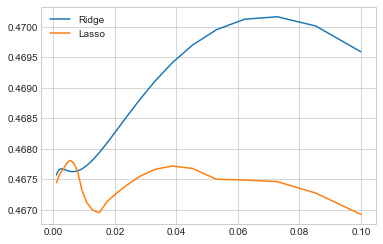

In [40]:
from sklearn.model_selection import cross_val_score

alphas = np.logspace(-3, -1, 30)

for Model in [linear_model.Ridge, linear_model.Lasso]:
    scores = [cross_val_score(Model(alpha), X_train, y_train, cv=3).mean()
              for alpha in alphas]
    plt.plot(alphas, scores, label=Model.__name__)
plt.legend();

### Using GridSearchCV for hyperparameter optimization

In [41]:
from sklearn.model_selection import GridSearchCV
for Model in [linear_model.Ridge, linear_model.Lasso]:
    gscv = GridSearchCV(Model(), dict(alpha=alphas), cv=3).fit(X_train, y_train)
    print('%s: %s' % (Model.__name__, gscv.best_params_))

Ridge: {'alpha': 0.0727895384398315}
Lasso: {'alpha': 0.005736152510448681}


We can see that GridSearchCV has obtained the values of alpha that produced a maximum in the curves plotted just before :). So it is a robust way to find optimal hyperparameter values.

In [42]:
# I don´t know well this chunk of code why is it for...
from sklearn.linear_model import RidgeCV, LassoCV
for Model in [RidgeCV, LassoCV]:
    scores = cross_val_score(Model(alphas=alphas, cv=3), X_train, y_train, cv=3)
    print(Model.__name__, np.mean(scores))

RidgeCV 0.46878063639198553
LassoCV 0.4654816226468624


## [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html?highlight=decisiontreeregressor#sklearn.tree.DecisionTreeRegressor)

Alternatively to Linear Regression, this algorithm can also be used for regression problems.

In [43]:
from sklearn.tree import DecisionTreeRegressor

d_tree = DecisionTreeRegressor(max_depth=12,random_state=42)
d_tree.fit(X_train, y_train)
d_tree_pred = d_tree.predict(X_test)

print(d_tree.feature_importances_)

summary.loc[len(summary)] = ['DecisionTree (max_depth=12)',
                     r2_score(y_test, d_tree_pred),
                     np.sqrt(mean_squared_error(y_test, d_tree_pred)),
                     float('NaN'),
                     float('NaN'),float('NaN'),float('NaN'),float('NaN'),float('NaN'),
                     float('NaN'),float('NaN'),float('NaN'),float('NaN'),float('NaN')]

summary.round(2).T

[0.05532647 0.02045624 0.41152379 0.07514729 0.07482025 0.06379299
 0.05826623 0.02311715 0.1368025  0.08074708]


,0,1,2,3,4,5,6,7,8
model,LinearRegression_BMI,"LinearRegression_BMI,age,bp",LinearRegression_blood,LinearRegression_allfeats,Ridge (alpha=0.1),Lasso (alpha=0.1),"Lasso (alpha=0.1, 7 feat.)","Ridge (alpha=0.2, 7 feat.)",DecisionTree (max_depth=12)
r2,0.32,0.35,0.42,0.48,0.49,0.5,0.5,0.5,-0.03
RMSE,61.45,59.81,56.5,53.37,53.01,52.48,52.48,52.45,75.33
intercept,152.08,151.88,152.31,151.67,151.73,151.83,151.83,151.86,NaN
age,975.28,48.02,NaN,47.75,52.86,0,NaN,NaN,NaN
bmi,NaN,813.74,NaN,531.97,-200.51,-151.42,-151.41,-154.95,NaN
bp,NaN,402.08,NaN,381.57,493.96,540.86,540.87,458.4,NaN
sex,NaN,NaN,NaN,-241.99,339.28,337.22,337.22,315.02,NaN
s1,NaN,NaN,-1193.1,-918.49,-118.06,-85.19,-85.2,-80.8,NaN
s2,NaN,NaN,872.41,508.25,-80.91,-0,NaN,NaN,NaN


## [AdaBoostRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html#sklearn.ensemble.AdaBoostRegressor)

Not gonna use it finally.

But a good list of Supervised Learning Algorithms in SKLearn can be found [here](https://scikit-learn.org/stable/supervised_learning.html).

## Polynomial Features

This is about generating polys from the data. It is a data preproccessing activity:

Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

In [44]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
#poly = PolynomialFeatures(interaction_only=True)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
print(X_train_poly.shape)

lm_9 = linear_model.Lasso(alpha=0.1)
lm_9.fit(X_train_poly, y_train)
y9_pred = lm_9.predict(X_test_poly)


print(r2_score(y_test, y9_pred))
print(np.sqrt(mean_squared_error(y_test, y9_pred)))

lm_9.coef_

(331, 66)
0.501975882135411
52.477794195897374


array([   0.        ,    0.        , -151.41550421,  540.85933829,
        337.22472854,  -85.19030645,   -0.        , -262.90345036,
          0.        ,  418.24822392,    9.92430726,    0.        ,
          0.        ,    0.        ,    0.        ,   -0.        ,
         -0.        ,   -0.        ,    0.        ,    0.        ,
          0.        ,   -0.        ,    0.        ,    0.        ,
          0.        ,   -0.        ,   -0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
         -0.        ,    0.        ,   -0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,   -0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
         -0.        ,   -0.        ,    0.        ,   -0.        ,
         -0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,   -0.        ,    0.        ,   -0.     

# SHAP

SHAP (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model.

An example of SHAP and the diabetes SKLearn dataset: [click here](https://shap.readthedocs.io/en/latest/example_notebooks/kernel_explainer/Diabetes%20regression.html)

In [1]:
#conda install -c conda-forge shap

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\30.Anaconda3

  added / updated specs:
    - shap


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.6.20          |   py37hf50a25e_2         152 KB  conda-forge
    conda-4.8.5                |   py37hf50a25e_2         3.0 MB  conda-forge
    openssl-1.1.1h             |       he774522_0         5.8 MB  conda-forge
    shap-0.36.0                |   py37h414f9d2_0         490 KB  conda-forge
    slicer-0.0.3               |             py_0          14 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         9.4 MB

The following NEW packages will be INSTALLED:

  shap               conda-forge/win-64::shap-0.36.0-py37h414f9d2_0
  slicer             conda-forge/noarch::slicer-0.0.3-py_0

The following packag

In [47]:
import shap
shap.initjs()

X_train_summary = shap.kmeans(X_train, 10)

def print_accuracy(f):
    print("Root mean squared test error = {0}".format(np.sqrt(np.mean((f(X_test) - y_test)**2))))
    time.sleep(0.5) # to let the print get out before any progress bars

lin_regr = linear_model.LinearRegression()
lin_regr.fit(X_train, y_train)

ex = shap.KernelExplainer(lin_regr.predict, X_train_summary)
shap_values = ex.shap_values(X_test.iloc[0,:])
shap.force_plot(ex.expected_value, shap_values, X_test.iloc[0,:])

In [46]:
shap_values = ex.shap_values(X_test.iloc[2,:])
shap.force_plot(ex.expected_value, shap_values, X_test.iloc[2,:])

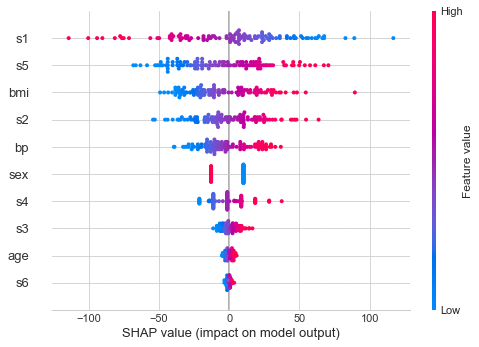

In [49]:
shap_values = ex.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

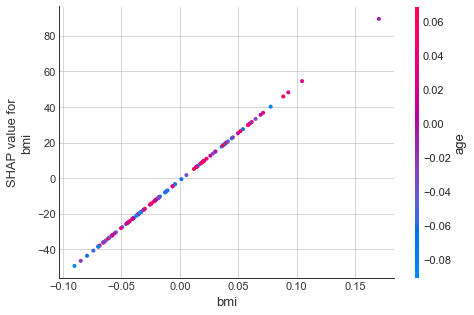

In [53]:
shap.dependence_plot("bmi", shap_values, X_test)

## Learn More!!

### [Learn regression algorithms using Python and scikit-learn](https://developer.ibm.com/tutorials/learn-regression-algorithms-using-python-and-scikit-learn/)

## Practice More!!

### [Stunning Website for IBM Developer UK for DS networking and access to some DS Projects and Repos](https://ibmdeveloperuk.github.io/)